In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

# Data Description & Visualization

In [ ]:
train_data = pd.read_csv("/content/Train.csv")
test_data = pd.read_csv("/content/Test.csv")
print(train_data.shape)
print(test_data.shape)

(8523, 12)
(5681, 11)


In [ ]:
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


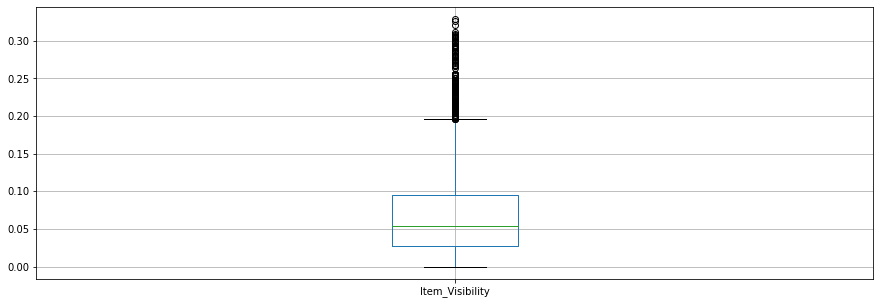

In [ ]:
plt.figure(figsize=(15, 5))
train_data.boxplot('Item_Visibility')
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


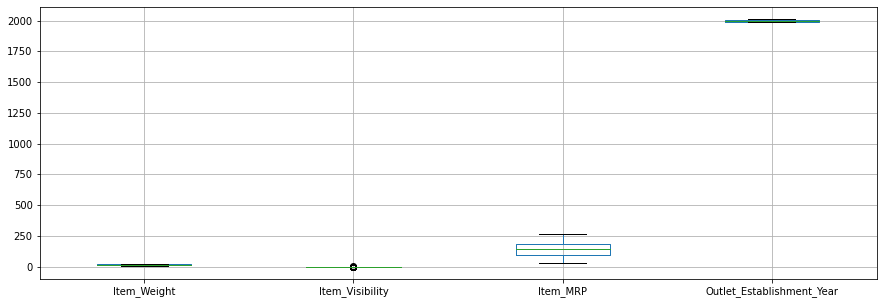

In [ ]:
plt.figure(figsize=(15, 5))
test_data.boxplot()
plt.show()

In [ ]:
print(train_data.info(), "\n")
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None 



,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
print(test_data.info(), "\n")
test_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB
None 



,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [ ]:
print(train_data['Outlet_Size'].describe(), "\n")
test_data['Outlet_Size'].describe()

count       6113
unique         3
top       Medium
freq        2793
Name: Outlet_Size, dtype: object 



count       4075
unique         3
top       Medium
freq        1862
Name: Outlet_Size, dtype: object

In [ ]:
print(train_data.groupby('Item_Identifier')['Item_Weight'].describe(), "\n")
print(train_data.groupby('Outlet_Identifier')['Outlet_Size'].describe())

                 count    mean           std     min     25%     50%     75%  \
Item_Identifier                                                                
DRA12              6.0  11.600  0.000000e+00  11.600  11.600  11.600  11.600   
DRA24              5.0  19.350  0.000000e+00  19.350  19.350  19.350  19.350   
DRA59              6.0   8.270  0.000000e+00   8.270   8.270   8.270   8.270   
DRB01              2.0   7.390  0.000000e+00   7.390   7.390   7.390   7.390   
DRB13              5.0   6.115  0.000000e+00   6.115   6.115   6.115   6.115   
...                ...     ...           ...     ...     ...     ...     ...   
NCZ30              6.0   6.590  9.729507e-16   6.590   6.590   6.590   6.590   
NCZ41              5.0  19.850  0.000000e+00  19.850  19.850  19.850  19.850   
NCZ42              5.0  10.500  0.000000e+00  10.500  10.500  10.500  10.500   
NCZ53              4.0   9.600  0.000000e+00   9.600   9.600   9.600   9.600   
NCZ54              5.0  14.650  0.000000

In [ ]:
print(train_data.shape)
test_data.shape

(8523, 12)


(5681, 11)

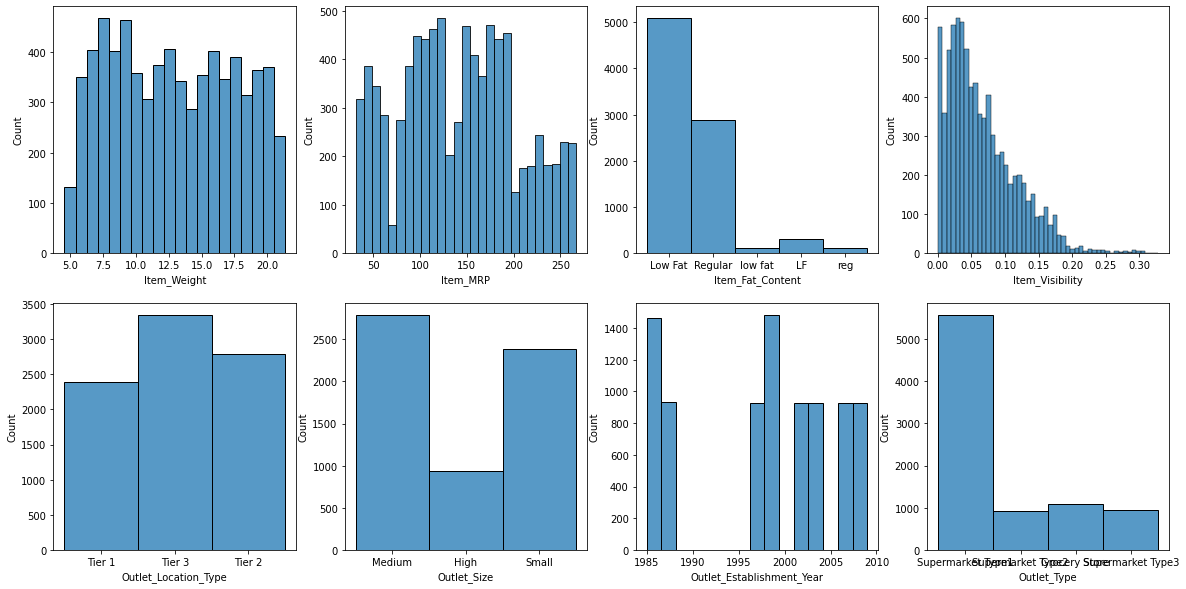

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20,10))
sns.histplot(data=train_data, x=train_data.Item_Weight, ax=axes[0][0])
sns.histplot(data=train_data, x=train_data.Item_MRP, ax=axes[0][1])
sns.histplot(data=train_data, x=train_data.Item_Fat_Content, ax=axes[0][2])
sns.histplot(data=train_data, x=train_data.Item_Visibility, ax=axes[0][3])
sns.histplot(data=train_data, x=train_data.Outlet_Location_Type, ax=axes[1][0])
sns.histplot(data=train_data, x=train_data.Outlet_Size, ax=axes[1][1])
sns.histplot(data=train_data, x=train_data.Outlet_Establishment_Year, ax=axes[1][2])
sns.histplot(data=train_data, x=train_data.Outlet_Type, ax=axes[1][3])

# Data Preprocessing

In [ ]:
train_data['Item_Weight'] = train_data.groupby('Item_Identifier')['Item_Weight'].transform(lambda w:w.fillna(w.mean()))
test_data['Item_Weight'] = test_data.groupby('Item_Identifier')['Item_Weight'].transform(lambda w:w.fillna(w.mean()))

train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(), inplace = True)
test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean(), inplace = True)

train_data['Outlet_Size'] = train_data['Outlet_Size'].fillna('Medium')
test_data['Outlet_Size'] = test_data['Outlet_Size'].fillna('Medium')

In [ ]:
print(train_data.shape)
test_data.shape

(8523, 12)


(5681, 11)

In [ ]:
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
print(train_data.duplicated().sum(),"\t",test_data.duplicated().sum())

0 	 0


In [ ]:
train_ = train_data.select_dtypes(exclude=['int', 'float'])
for col in train_.columns:
    print(col,": ",train_[col].unique(), "\n")

print("\nTEST")
test_ = test_data.select_dtypes(exclude=['int', 'float'])
for col in test_.columns:
    print(col,": ",test_[col].unique(), "\n")

Item_Identifier :  ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05'] 

Item_Fat_Content :  ['Low Fat' 'Regular' 'low fat' 'LF' 'reg'] 

Item_Type :  ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood'] 

Outlet_Identifier :  ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019'] 

Outlet_Size :  ['Medium' 'High' 'Small'] 

Outlet_Location_Type :  ['Tier 1' 'Tier 3' 'Tier 2'] 

Outlet_Type :  ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3'] 


TEST
Item_Identifier :  ['FDW58' 'FDW14' 'NCN55' ... 'NCI29' 'FDP28' 'FDF04'] 

Item_Fat_Content :  ['Low Fat' 'reg' 'Regular' 'LF' 'low fat'] 

Item_Type :  ['Snack Foods' 'Dairy' 'Others' 'Fruits and Vegetables' 'Baking Goods'
 'Health and Hygiene' 'Breads' 'Hard Drinks' 'Seafood' 'Soft Drinks'
 'Household' 'Frozen F

In [ ]:
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace(to_replace='Low Fat', value='low fat')
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace(to_replace='LF', value='low fat')
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace(to_replace='reg', value='Regular')
print(train_data['Item_Fat_Content'].unique())

test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace(to_replace='Low Fat', value='low fat')
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace(to_replace='LF', value='low fat')
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace(to_replace='reg', value='Regular')
print(test_data['Item_Fat_Content'].unique())

['low fat' 'Regular']
['low fat' 'Regular']


In [ ]:
train_median = train_data['Item_Visibility'].median(skipna=True)
train_data['Item_Visibility'] = train_data.Item_Visibility.mask(train_data.Item_Visibility == 0,train_median)

test_median = test_data['Item_Visibility'].median(skipna=True)
test_data['Item_Visibility'] = test_data.Item_Visibility.mask(test_data.Item_Visibility == 0,train_median)

train_data['Item_Visibility'].describe()

count    8523.000000
mean        0.069460
std         0.048893
min         0.003575
25%         0.033085
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [ ]:
for index, id in train_data['Item_Identifier'].iteritems():
    if id[0:2] == "NC":
        train_data.loc[index, 'Item_Fat_Content'] = 'no fat'

for index, id in test_data['Item_Identifier'].iteritems():
    if id[0:2] == "NC":
        test_data.loc[index, 'Item_Fat_Content'] = 'no fat'

train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,no fat,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy import stats

cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

for col in cols:
    train_data[col] = list(stats.boxcox(train_data[col]+1)[0])
    train_data[col] = StandardScaler().fit_transform(train_data[[col]])

for col in cols:
    test_data[col] = list(stats.boxcox(test_data[col]+1)[0])
    test_data[col] = StandardScaler().fit_transform(test_data[[col]])

train_data.head()

/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,-0.733469,low fat,-1.445043,Dairy,1.623670,OUT049,0.048562,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,-1.598255,Regular,-1.310830,Soft Drinks,-1.595016,OUT018,1.461925,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,0.991427,low fat,-1.415012,Meat,0.081237,OUT049,0.048562,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,1.307915,Regular,-0.138521,Fruits and Vegetables,0.689968,OUT010,-0.075796,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,-0.822082,no fat,-0.138521,Household,-1.476078,OUT013,-1.270835,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
train_ = train_data.select_dtypes(exclude=['int', 'float'])
for col in train_.columns:
    print(col,": ",train_[col].unique(), "\n")

Item_Identifier :  ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05'] 

Item_Fat_Content :  ['low fat' 'Regular' 'no fat'] 

Item_Type :  ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood'] 

Outlet_Identifier :  ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019'] 

Outlet_Size :  ['Medium' 'High' 'Small'] 

Outlet_Location_Type :  ['Tier 1' 'Tier 3' 'Tier 2'] 

Outlet_Type :  ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3'] 



In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ord_cols = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type']
OH_cols = ['Item_Type', 'Outlet_Type']

train_data = pd.get_dummies(train_data,columns=OH_cols,drop_first=True)
test_data = pd.get_dummies(test_data,columns=OH_cols,drop_first=True)

train_data[ord_cols] = OrdinalEncoder().fit_transform(train_data[ord_cols])
test_data[ord_cols] = OrdinalEncoder().fit_transform(test_data[ord_cols])


In [ ]:
submission_data = test_data[['Item_Identifier', 'Outlet_Identifier']]

train_data = train_data.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
test_data = test_data.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

print(train_data.shape)
train_data.tail()

(8523, 26)


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8518,-1.342525,1.0,-0.060509,1.148258,-1.270835,0.0,2.0,2778.3834,0,0,...,0,0,0,0,1,0,0,1,0,0
8519,-0.956214,0.0,-0.339041,-0.463127,0.439191,1.0,1.0,549.2850,0,0,...,0,0,0,0,0,0,0,1,0,0
8520,-0.431486,2.0,-0.716574,-0.867930,0.714912,2.0,1.0,1193.1136,0,0,...,0,0,0,0,0,0,0,1,0,0
8521,-1.252178,0.0,1.484527,-0.548996,1.461925,1.0,2.0,1845.5976,0,0,...,0,0,0,0,1,0,0,0,1,0
8522,0.464435,1.0,-0.402836,-1.047227,-0.197336,2.0,0.0,765.6700,0,0,...,0,0,0,0,0,1,0,1,0,0


In [ ]:
submission_data.head()

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027


# Modeling

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

In [ ]:
train_y = train_data['Item_Outlet_Sales']
train_X = train_data.drop(['Item_Outlet_Sales'], axis=1)
test_X = test_data

def modelfit(model, train_X, train_y, test_X, submission_data, submission_name):
    
    model.fit(train_X, train_y)
    train_predictions = model.predict(train_X)

    #Perform cross-validation:
    cv_score = cross_val_score(model, train_X, train_y, cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(train_y.values, train_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    test_y = model.predict(test_X)
    
    #Export submission file:
    submission = submission_data.copy()
    submission['results'] = test_y
    submission.to_csv(submission_name, index=False)

In [ ]:
linear_model = LinearRegression()
modelfit(linear_model, train_X, train_y, test_X, submission_data, 'linear_model.csv')


Model Report
RMSE : 1130
CV Score : Mean - 1134 | Std - 44.4 | Min - 1076 | Max - 1220


In [ ]:
ridge_model = Ridge(alpha=0.07)
modelfit(ridge_model, train_X, train_y, test_X, submission_data, 'ridge_model.csv')


Model Report
RMSE : 1130
CV Score : Mean - 1134 | Std - 44.4 | Min - 1076 | Max - 1220


In [ ]:
elastic_model = ElasticNet(alpha=0.001)
modelfit(elastic_model, train_X, train_y, test_X, submission_data, 'elastic_model.csv')


Model Report
RMSE : 1130
CV Score : Mean - 1134 | Std - 44.49 | Min - 1076 | Max - 1220


In [ ]:
forest_model = RandomForestRegressor(n_estimators=500, max_depth=15)
modelfit(forest_model, train_X, train_y, test_X, submission_data, 'forest_model.csv')


Model Report
RMSE : 647
CV Score : Mean - 1119 | Std - 41.97 | Min - 1046 | Max - 1207


In [ ]:
xgb_model = XGBRegressor(n_estimators=500, max_depth=15, objective ='reg:squarederror')
modelfit(xgb_model, train_X, train_y, test_X, submission_data, 'xgb_model.csv')


Model Report
RMSE : 13.41
CV Score : Mean - 1215 | Std - 48.57 | Min - 1120 | Max - 1329
